# Problem : CAD

# Data Information:

1. Age: age of the patient [years]

2. Sex: sex of the patient [M: Male, F: Female]

3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
   * Angina which is chest pain caused by blockages in the blood vessels leading to your heart.
   
   
4. RestingBP: resting blood pressure [mm Hg]
   * Ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg
   
   
5. Cholesterol: serum cholesterol [mm/dl]
   * A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. A total cholesterol level of 200 to 239 mg/dL (5.17 to 6.18 mmol/L) is borderline high. A total cholesterol level of 240 mg/dL (6.21 mmol/L) or greater is high
   
   
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
   * A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes
   
   
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
   * An ST-T abnormality on an electrocardiogram (ECG) is known to independently predict subsequent morbidity and mortality from cardiovascular diseases.
   * Left ventricular hypertrophy is a thickening of the wall of the heart's main pumping chamber. This thickening may result in elevation of pressure within the heart and sometimes poor pumping action. it can lead to severe problems such as heart failure, sudden cardiac arrest and ischemic stroke.
   
   
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
   *  To find MaxHR ,subtract your age from 220, according to the Centers for Disease Control and Prevention . For example, if you're 30 years old, your maximum heart rate is 190 bpm. It's important to note that this is just a guide.maximum heart rate achieved between 151 and 180 are referred as 'healthy' class.
   
   
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
    * Oldpeak: the depression observed between the first and second parts of the ST segment in an ECG. oldpeak less than or equal to 1.2 considered within the normal range.
    
    
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12. HeartDisease: output class [1: heart disease, 0: Normal]

In [9]:
!pip install plotly

In [11]:
import plotly.graph_objs as go
import plotly.express as px

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read the data

In [2]:
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [3]:
#Visualize top 5 rows
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
# Generate the descriptive statistics using describe()
desc= data.describe().loc[['mean', 'min', 'max']]
#fuction to add color
def color(val):
    return 'background-color: pink'
styled_desc = desc.style.applymap(color)
styled_desc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
#checking missing data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# checking the distribution of the target variable
data["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [19]:
data["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

**There are zero values for cholesterol and RestingBP which are something abnormal, we will check how many of them are there and deal with them later**

In [3]:
chol = sum(data["Cholesterol"] == 0)
print(f'There are/is {chol} patient/s with zero cholesterol')
bp = sum(data["RestingBP"] == 0)
print(f'There are/is {bp} patient/s with zero resting blood pressure')

There are/is 172 patient/s with zero cholesterol
There are/is 1 patient/s with zero resting blood pressure


In [3]:
data = data[data["Cholesterol"] != 0]
data = data[data["RestingBP"] != 0]

In [12]:
data["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

# Data Analysis
#### There are two major ways to analyze the data: 
1. Univariate Analysis: Analysing realationship of each feature with the target. 
2. Multivariate Analysis : Analysing realationship between multiple variables. 

## Univariate Analysis


/tmp/ipykernel_47/3648689208.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3,1)


<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

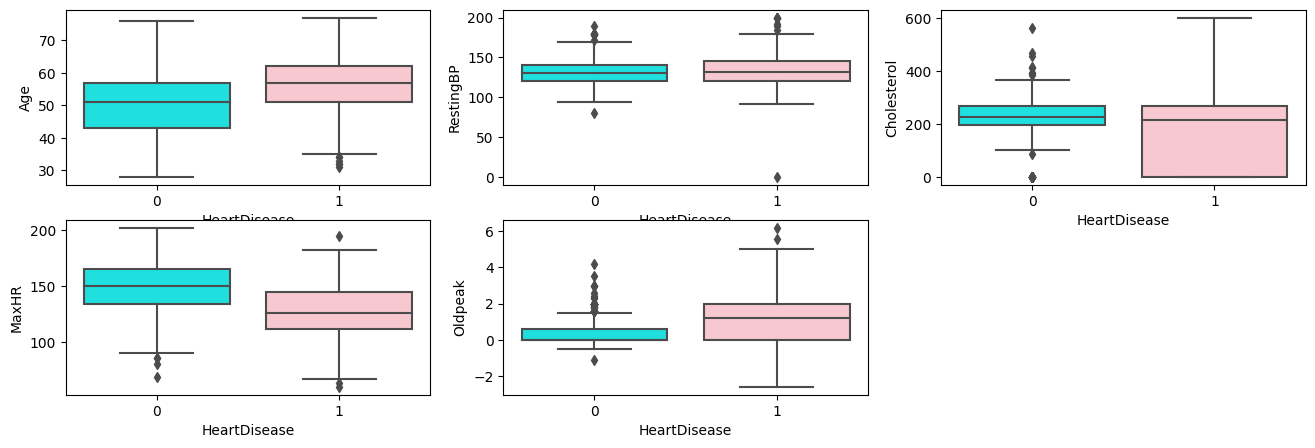

In [41]:
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.subplot(2, 3,1)
sns.boxplot(x=data["HeartDisease"], y=data["Age"], palette=['cyan', 'pink'])
plt.subplot(2, 3,2)
sns.boxplot(x=data["HeartDisease"], y=data["RestingBP"],palette=['cyan', 'pink'])
plt.subplot(2, 3,3)
sns.boxplot(x=data["HeartDisease"], y=data["Cholesterol"],palette=['cyan', 'pink'])
plt.subplot(2, 3,4)
sns.boxplot(x=data["HeartDisease"], y=data["MaxHR"],palette=['cyan', 'pink'])
plt.subplot(2, 3,5)
sns.boxplot(x=data["HeartDisease"], y=data["Oldpeak"],palette=['cyan', 'pink'])

**find mean values for heart disease and no disease**

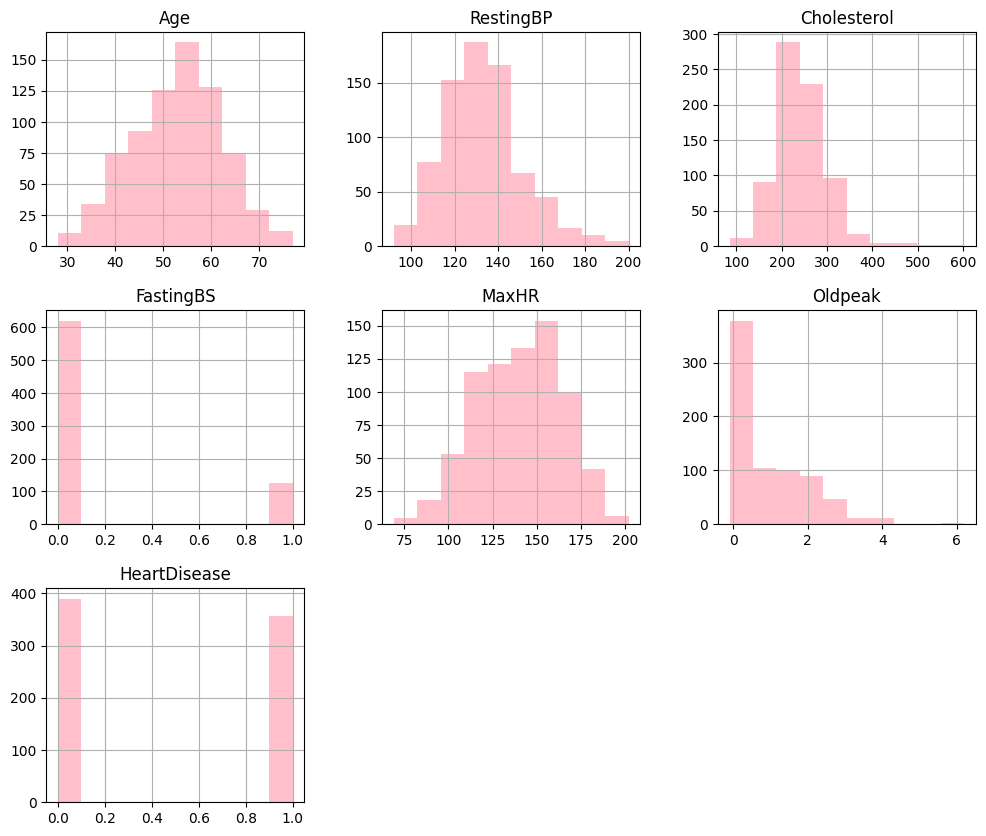

In [5]:
data.hist(figsize=(12,10), color='pink')
plt.show()

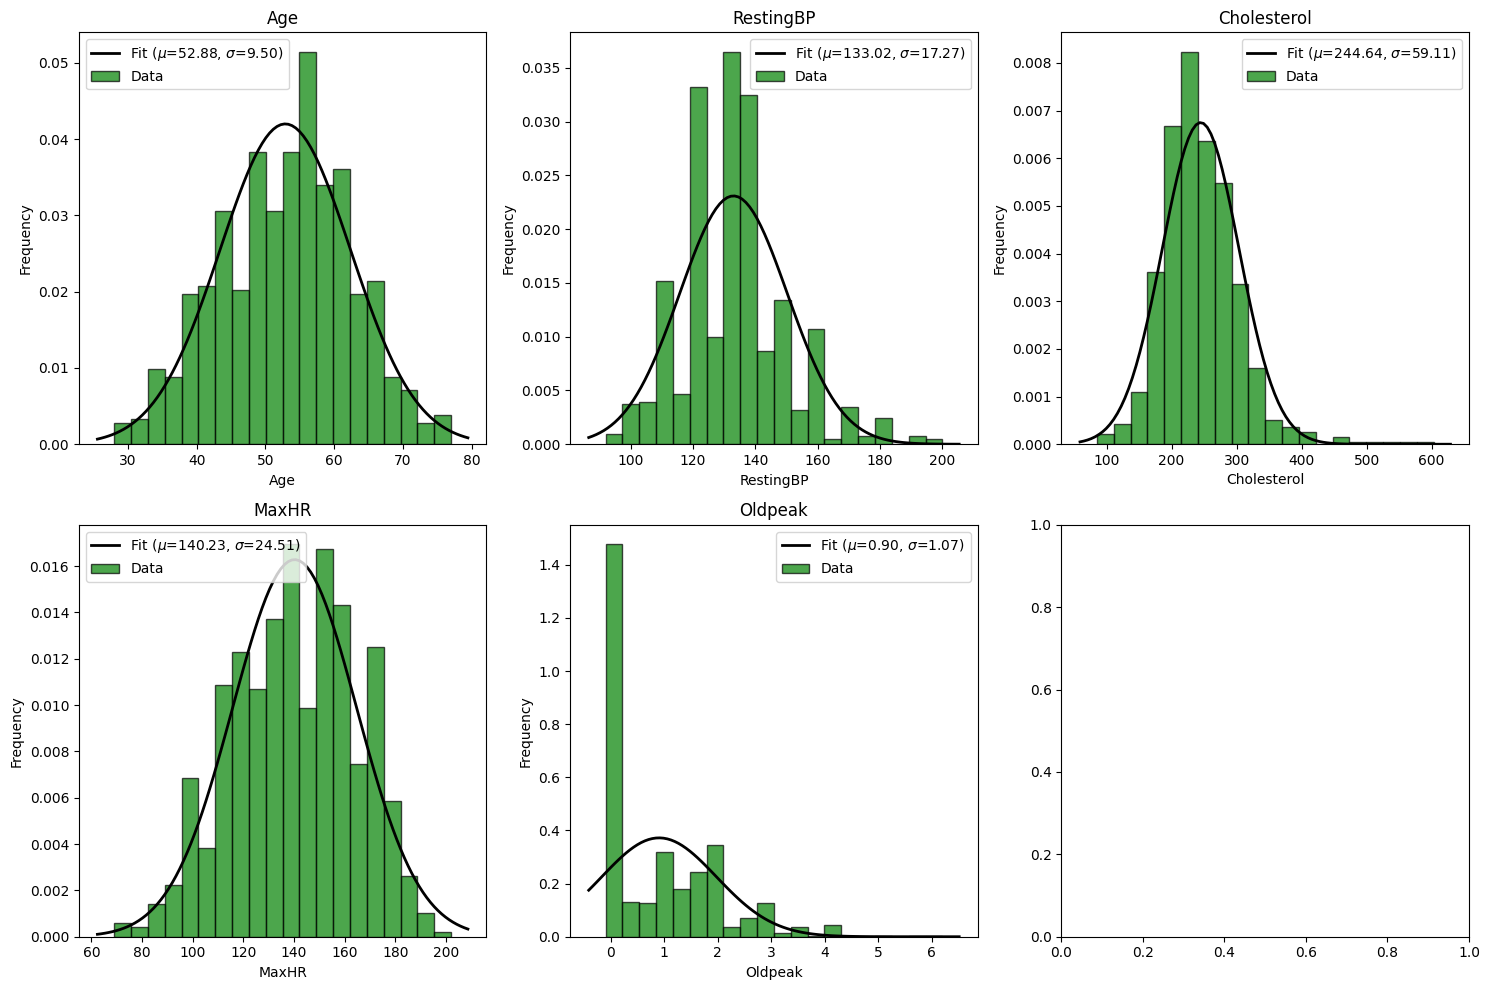

In [6]:
from scipy.stats import norm

# Define the columns for which you want to plot histograms
columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Iterate through each column and plot histogram with normal distribution line
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    
    # Plot histogram
    ax.hist(data[column], bins=20, density=True, alpha=0.7, color='green', edgecolor='black')
    
    # Plot normal distribution line
    mu, sigma = norm.fit(data[column])
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    ax.plot(x, p, 'k', linewidth=2)
    
    # Add labels and title
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
    # Add legend
    ax.legend([f'Fit ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})', 'Data'])

# Adjust layout and display plot
plt.tight_layout()
plt.show()

Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
 
Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.

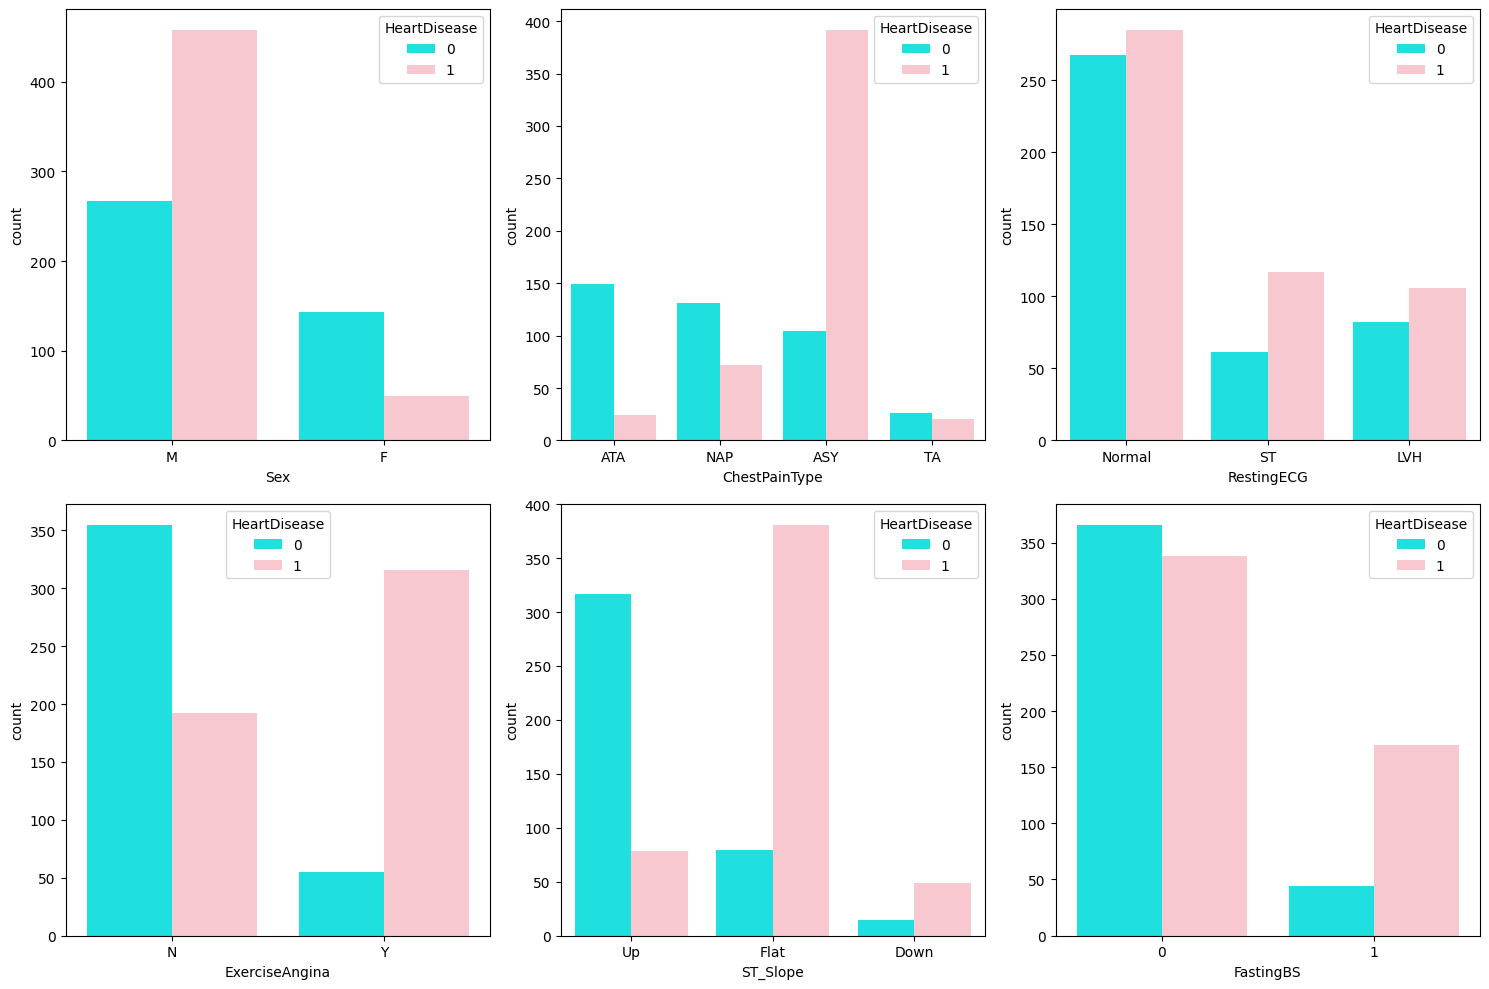

In [36]:
# Determine the number of columns and rows based on the number of features
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope","FastingBS"]
ncols = 3
nrows = len(cat_cols) // ncols + (len(cat_cols) % ncols > 0)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))

# Loop through categorical features
for idx, feature in enumerate(cat_cols):
    row = idx // ncols
    col = idx % ncols
    sns.countplot(data=data, x=feature, hue='HeartDisease', ax=axes[row, col],palette=['cyan', 'pink'])

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
numerical= data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categorical = data.select_dtypes('object').columns

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

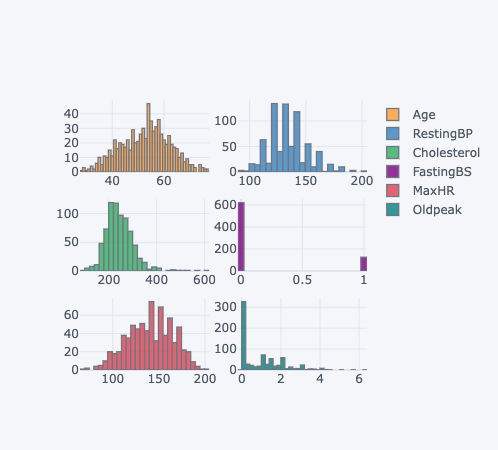

In [14]:
data[numerical].iplot(kind='histogram',subplots=True,bins=50)

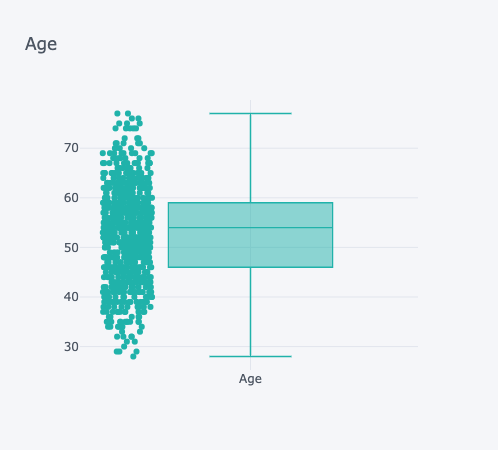

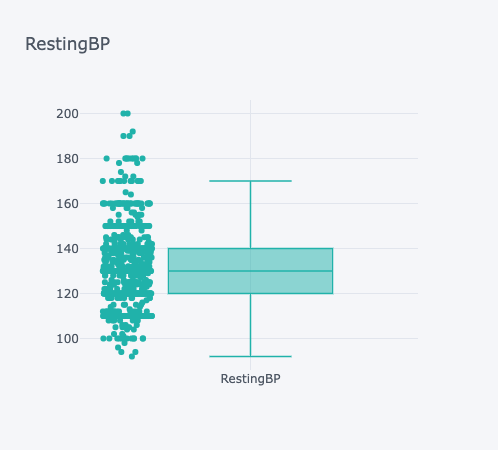

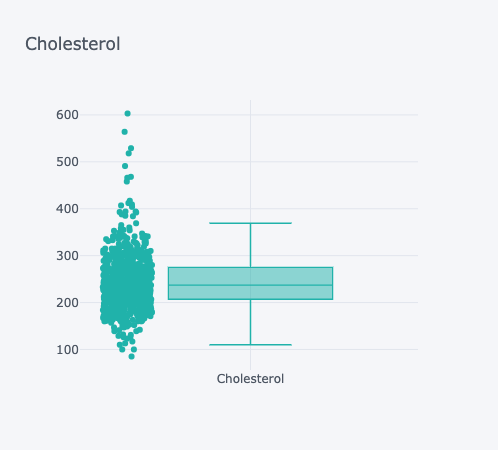

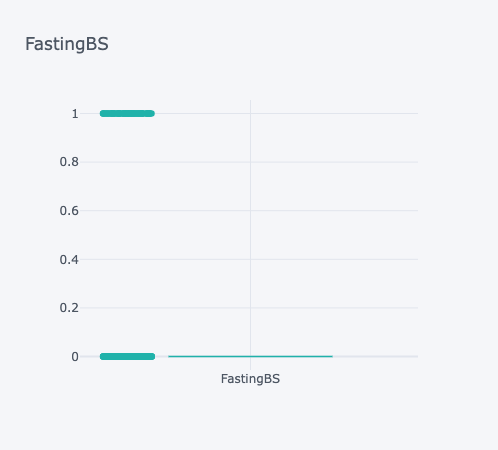

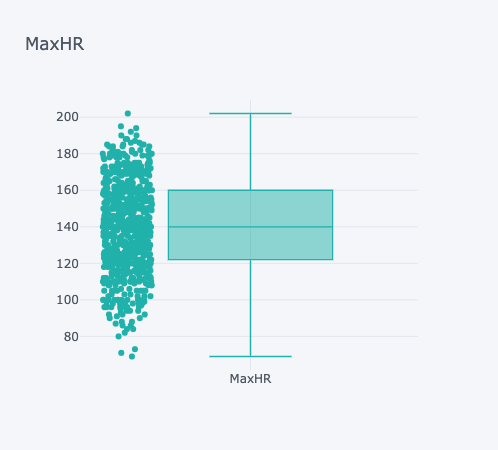

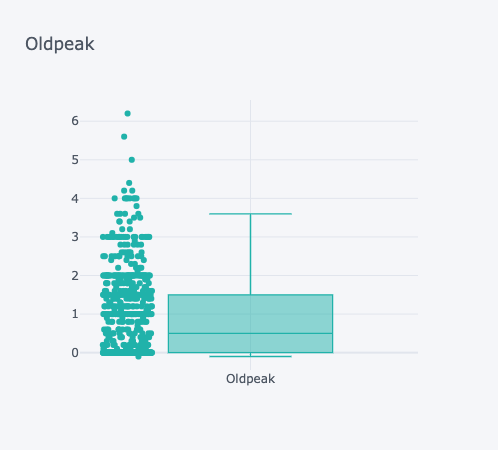

In [16]:
for i in numerical:
    data[i].iplot(kind="box", title=i, boxpoints="all",color='lightseagreen')

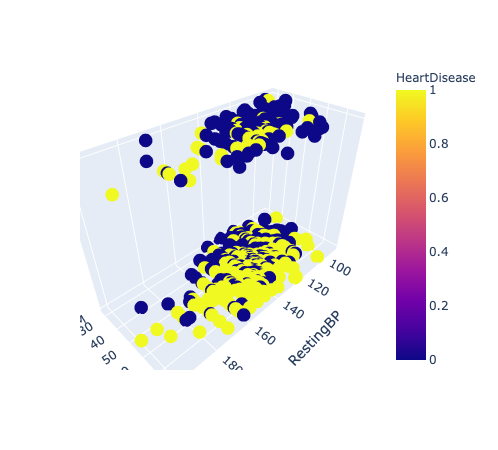

In [20]:
fig = px.scatter_3d(data,
                   x='RestingBP',
                   y='Age',
                   z='Sex',
                   color='HeartDisease')
fig.show();

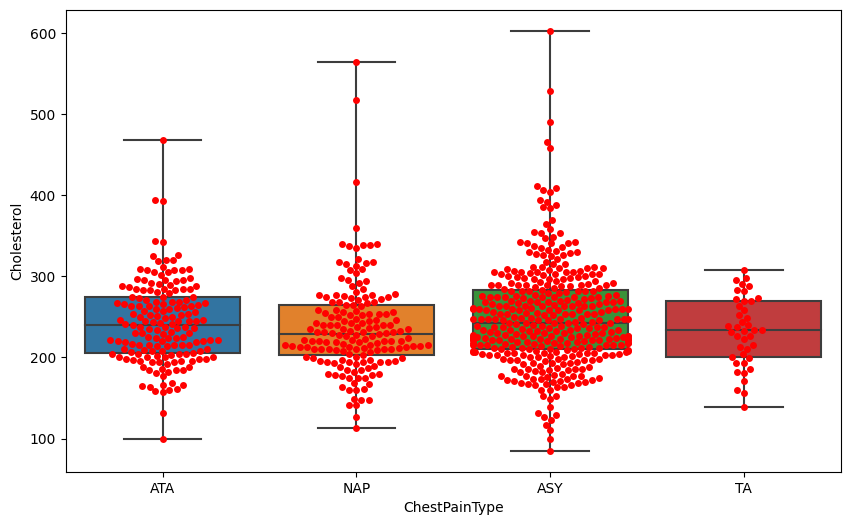

In [21]:
sns.boxplot(y="Cholesterol", x="ChestPainType", data=data, whis=np.inf)
sns.swarmplot(y="Cholesterol",x="ChestPainType", data=data, color="r");

## Multivariate Analysis

### convert categorical to numbers

In [4]:
cat_cols = list(data.select_dtypes(['object']).columns)
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [5]:
cat_map={}
for cat in cat_cols:
    cat_map[cat] = data[cat].unique().tolist()
    
cat_map

{'Sex': ['M', 'F'],
 'ChestPainType': ['ATA', 'NAP', 'ASY', 'TA'],
 'RestingECG': ['Normal', 'ST', 'LVH'],
 'ExerciseAngina': ['N', 'Y'],
 'ST_Slope': ['Up', 'Flat', 'Down']}

In [6]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
print('\nSex ',data['Sex'].unique())
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
print('\nChestPainType' ,data['ChestPainType'].unique())
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
print('\nRestingECG ',data['RestingECG'].unique())
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
print('\nExerciseAngina',data['ExerciseAngina'].unique())
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])
print('\nST_Slope',data['ST_Slope'].unique())


Sex  [1 0]

ChestPainType [1 2 0 3]

RestingECG  [1 2 0]

ExerciseAngina [0 1]

ST_Slope [2 1 0]


In [8]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


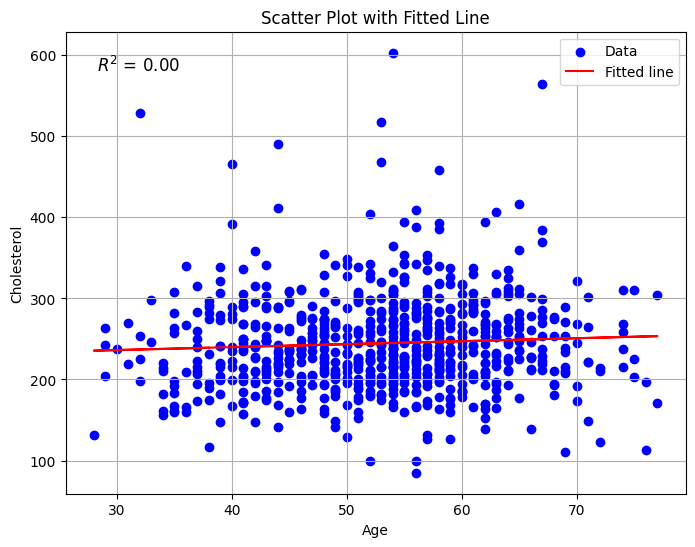

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming your data is stored in a DataFrame named 'data'
X = data[['Age']]
y = data['Cholesterol']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')

# Plot the fitted line
plt.plot(X, y_pred, color='red', label='Fitted line')

# Annotate the R-squared value
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot with Fitted Line')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

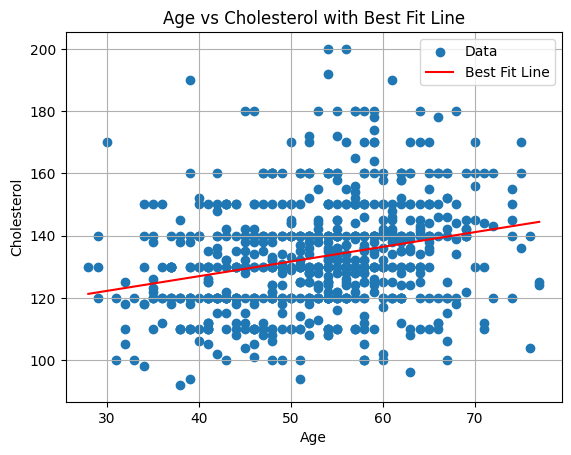

In [14]:
# Extracting Age and Cholesterol data
age = data['Age']
cholesterol = data['RestingBP']

# Scatter plot
plt.scatter(age, cholesterol, label='Data')

# Best fit line
coefficients = np.polyfit(age, cholesterol, 1)  # Fit a linear regression (1st degree polynomial)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(min(age), max(age), 100)
plt.plot(x_values, polynomial(x_values), color='red', label='Best Fit Line')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol with Best Fit Line')

# Adding legend
plt.legend()

# Display plot
plt.grid(True)
plt.show()

<Axes: >

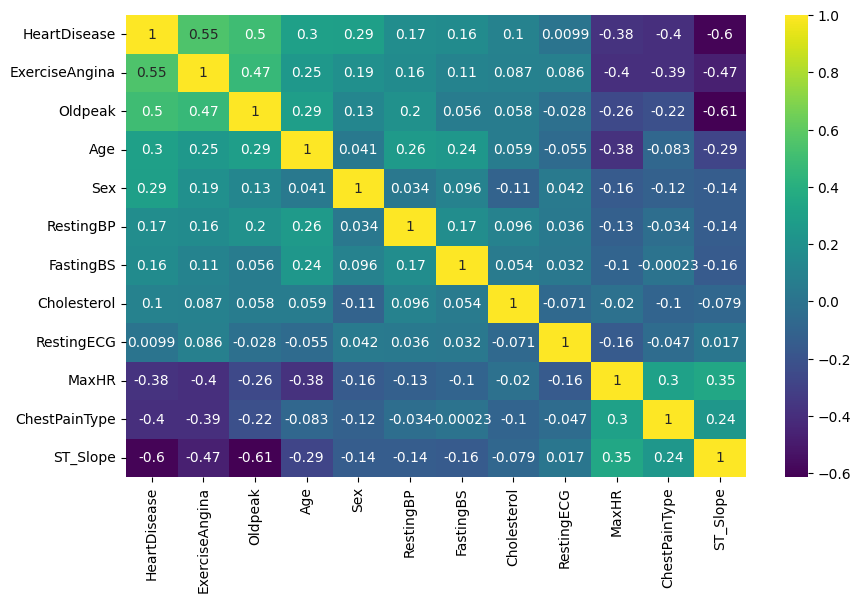

In [10]:
k = 12
cols = data.corr().nlargest(k,'HeartDisease')['HeartDisease'].index 
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

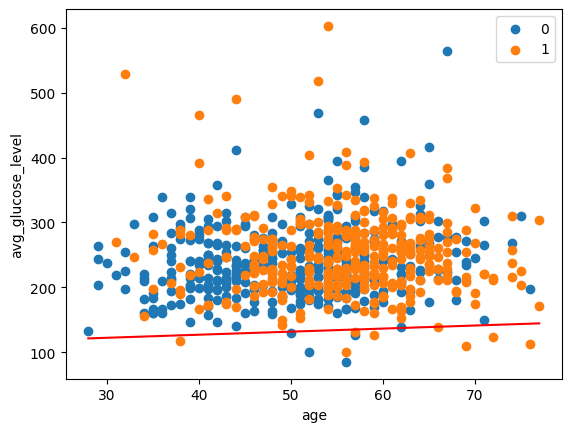

In [15]:
#relationship between age and avg glucose level
plt.scatter(data.Age[data.HeartDisease==0], data.Cholesterol[data.HeartDisease==0])
plt.scatter(data.Age[data.HeartDisease==1], data.Cholesterol[data.HeartDisease==1])

plt.xlabel("age")
plt.ylabel("avg_glucose_level")
plt.legend(['0','1'])

## Use interactive plots 

# Feature Selection

* Chi-square for categorical
* ANOVA for numerical
* Try more 

# Model Building

add ROC_AUC score 

In [9]:
#define X and y
X = data.drop(['HeartDisease'],axis=1)
y = data["HeartDisease"]

In [10]:
#Split the data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Perform K-fold CV ONLY on the training set (that will allow us to compare results).
* Perform GridSearchCV ONLY on the training set.
* Perform K-fold CV using hyperparameters obtained from GridSearchCV procedure ONLY on the training set and compare results.

## Logistic Regression 

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression


# Assuming 'data' is your DataFrame containing features and target

# Separate features and target
X = data.drop(['HeartDisease'], axis=1)
y = data["HeartDisease"]

# Specify which features to scale and which to normalize
scaler = ColumnTransformer([
    ('scaling', StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']),
    ('normalizing',MinMaxScaler(), ['Oldpeak'])
], remainder='passthrough')

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

fold = 1
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit and transform only on training data
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform test data using the parameters learned from training data
    X_test_scaled = scaler.transform(X_test)

    # Instantiate and train the logistic regression model
    logreg = LogisticRegression(solver='liblinear', C=0.1, penalty="l1", random_state=1234, class_weight='balanced')
    logreg.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = logreg.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print metrics for each fold
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    fold += 1

# Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")


Fold 1 - Accuracy: 0.8533333333333334, Precision: 0.8571428571428571, Recall: 0.8333333333333334, F1-Score: 0.8450704225352113
Fold 2 - Accuracy: 0.9066666666666666, Precision: 0.967741935483871, Recall: 0.8333333333333334, F1-Score: 0.8955223880597015
Fold 3 - Accuracy: 0.8, Precision: 0.7560975609756098, Recall: 0.8611111111111112, F1-Score: 0.8051948051948052
Fold 4 - Accuracy: 0.84, Precision: 0.875, Recall: 0.7777777777777778, F1-Score: 0.823529411764706
Fold 5 - Accuracy: 0.72, Precision: 0.7272727272727273, Recall: 0.6666666666666666, F1-Score: 0.6956521739130435
Fold 6 - Accuracy: 0.8533333333333334, Precision: 0.8787878787878788, Recall: 0.8055555555555556, F1-Score: 0.8405797101449276
Fold 7 - Accuracy: 0.8918918918918919, Precision: 0.8857142857142857, Recall: 0.8857142857142857, F1-Score: 0.8857142857142857
Fold 8 - Accuracy: 0.8378378378378378, Precision: 0.8484848484848485, Recall: 0.8, F1-Score: 0.823529411764706
Fold 9 - Accuracy: 0.7972972972972973, Precision: 0.777777

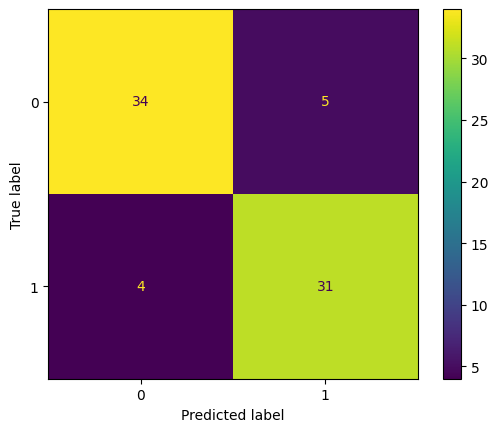

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming you have already imported required libraries and defined X, y, and cv

# Define parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty norm
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Initialize grid search with logistic regression model
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=cv, scoring='accuracy')

fold = 1
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit grid search on the training data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best estimator from grid search
    best_estimator = grid_search.best_estimator_

    # Predict on the test set using the best estimator
    y_pred = best_estimator.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print metrics for each fold
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    fold += 1

# Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

Fold 1 - Accuracy: 0.84, Precision: 0.8333333333333334, Recall: 0.8333333333333334, F1-Score: 0.8333333333333334
Fold 2 - Accuracy: 0.88, Precision: 0.9655172413793104, Recall: 0.7777777777777778, F1-Score: 0.8615384615384615
Fold 3 - Accuracy: 0.8533333333333334, Precision: 0.8048780487804879, Recall: 0.9166666666666666, F1-Score: 0.8571428571428571
Fold 4 - Accuracy: 0.8933333333333333, Precision: 0.8888888888888888, Recall: 0.8888888888888888, F1-Score: 0.8888888888888888
Fold 5 - Accuracy: 0.7733333333333333, Precision: 0.7714285714285715, Recall: 0.75, F1-Score: 0.7605633802816902
Fold 6 - Accuracy: 0.8933333333333333, Precision: 0.8888888888888888, Recall: 0.8888888888888888, F1-Score: 0.8888888888888888
Fold 7 - Accuracy: 0.918918918918919, Precision: 0.8918918918918919, Recall: 0.9428571428571428, F1-Score: 0.9166666666666667
Fold 8 - Accuracy: 0.8378378378378378, Precision: 0.8285714285714286, Recall: 0.8285714285714286, F1-Score: 0.8285714285714286
Fold 9 - Accuracy: 0.797297

## SVM

In [24]:
from sklearn.svm import SVC
from sklearn import svm


X = data.drop(['HeartDisease'],axis=1)
y = data["HeartDisease"]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Specify which features to scale and which to normalize
scaler = ColumnTransformer([
    ('scaling', StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']),
    ('normalizing',MinMaxScaler(), ['Oldpeak'])
], remainder='passthrough')

fold = 1
for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    # Fit and transform only on training data
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform test data using the parameters learned from training data
    X_test_scaled = scaler.transform(X_test)
   
    svm_model = svm.SVC(C=1.0, kernel='rbf', gamma='scale')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

        # Print metrics for each fold
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    fold += 1

# Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")

Fold 1 - Accuracy: 0.86, Precision: 0.8923076923076924, Recall: 0.8055555555555556, F1-Score: 0.8467153284671534
Fold 2 - Accuracy: 0.87248322147651, Precision: 0.8333333333333334, Recall: 0.9154929577464789, F1-Score: 0.87248322147651
Fold 3 - Accuracy: 0.8523489932885906, Precision: 0.8356164383561644, Recall: 0.8591549295774648, F1-Score: 0.8472222222222222
Fold 4 - Accuracy: 0.87248322147651, Precision: 0.8333333333333334, Recall: 0.9154929577464789, F1-Score: 0.87248322147651
Fold 5 - Accuracy: 0.8791946308724832, Precision: 0.8354430379746836, Recall: 0.9295774647887324, F1-Score: 0.88
Mean Accuracy: 0.8673020134228187
Mean Precision: 0.8460067670610414
Mean Recall: 0.8850547730829421
Mean F1-Score: 0.8637807987284791


# LGB Model

In [52]:
from lightgbm import LGBMClassifier
#define the classifier


#Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation and calculate metrics for each fold
fold = 1
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lgb= LGBMClassifier()
    lgb.fit(X_train, y_train)
    y_pred = lgb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print metrics for each fold
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    fold += 1

# Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")

Fold 1 - Accuracy: 0.8933333333333333, Precision: 0.9117647058823529, Recall: 0.8611111111111112, F1-Score: 0.8857142857142858
Fold 2 - Accuracy: 0.9466666666666667, Precision: 0.9705882352941176, Recall: 0.9166666666666666, F1-Score: 0.9428571428571428
Fold 3 - Accuracy: 0.92, Precision: 0.8947368421052632, Recall: 0.9444444444444444, F1-Score: 0.918918918918919
Fold 4 - Accuracy: 0.92, Precision: 0.8947368421052632, Recall: 0.9444444444444444, F1-Score: 0.918918918918919
Fold 5 - Accuracy: 0.8133333333333334, Precision: 0.7894736842105263, Recall: 0.8333333333333334, F1-Score: 0.8108108108108109
Fold 6 - Accuracy: 0.9066666666666666, Precision: 0.8717948717948718, Recall: 0.9444444444444444, F1-Score: 0.9066666666666667
Fold 7 - Accuracy: 0.8378378378378378, Precision: 0.7948717948717948, Recall: 0.8857142857142857, F1-Score: 0.8378378378378378
Fold 8 - Accuracy: 0.8513513513513513, Precision: 0.875, Recall: 0.8, F1-Score: 0.8358208955223881
Fold 9 - Accuracy: 0.8108108108108109, Pre

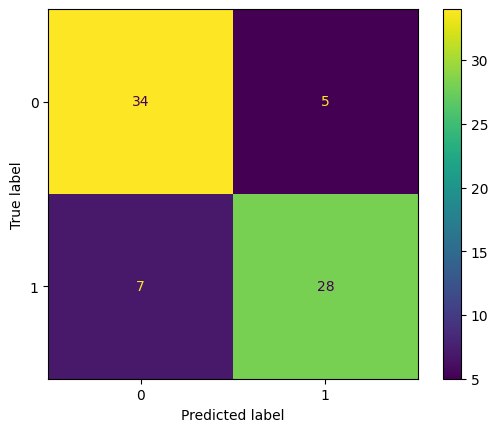

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

# RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

accuracies=[]
precisions=[]
recalls=[]
f1_scores=[]

fold=1
for train_index,test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    
    # Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")

Fold 1 - Accuracy: 0.8533333333333334, Precision: 0.8787878787878788, Recall: 0.8055555555555556, F1-Score: 0.8405797101449276
Fold 1 - Accuracy: 0.9066666666666666, Precision: 0.9393939393939394, Recall: 0.8611111111111112, F1-Score: 0.8985507246376813
Fold 1 - Accuracy: 0.8533333333333334, Precision: 0.8048780487804879, Recall: 0.9166666666666666, F1-Score: 0.8571428571428571
Fold 1 - Accuracy: 0.88, Precision: 0.8857142857142857, Recall: 0.8611111111111112, F1-Score: 0.8732394366197184
Fold 1 - Accuracy: 0.84, Precision: 0.8333333333333334, Recall: 0.8333333333333334, F1-Score: 0.8333333333333334
Fold 1 - Accuracy: 0.8666666666666667, Precision: 0.8421052631578947, Recall: 0.8888888888888888, F1-Score: 0.8648648648648649
Fold 1 - Accuracy: 0.9324324324324325, Precision: 0.9166666666666666, Recall: 0.9428571428571428, F1-Score: 0.9295774647887323
Fold 1 - Accuracy: 0.8513513513513513, Precision: 0.8529411764705882, Recall: 0.8285714285714286, F1-Score: 0.8405797101449276
Fold 1 - Acc

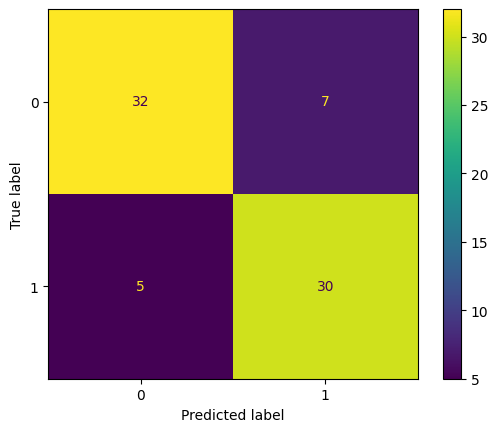

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

# XGB

In [54]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier()
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
accuracies=[]
precisions=[]
recalls=[]
f1_scores=[]

fold=1
for train_index,test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_clf.fit(X_train,y_train)
    y_pred = xgb_clf.predict(X_test)
    
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    
    # Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")

Fold 1 - Accuracy: 0.8533333333333334, Precision: 0.8787878787878788, Recall: 0.8055555555555556, F1-Score: 0.8405797101449276
Fold 1 - Accuracy: 0.9066666666666666, Precision: 0.8918918918918919, Recall: 0.9166666666666666, F1-Score: 0.9041095890410958
Fold 1 - Accuracy: 0.9066666666666666, Precision: 0.8717948717948718, Recall: 0.9444444444444444, F1-Score: 0.9066666666666667
Fold 1 - Accuracy: 0.8933333333333333, Precision: 0.8888888888888888, Recall: 0.8888888888888888, F1-Score: 0.8888888888888888
Fold 1 - Accuracy: 0.8533333333333334, Precision: 0.8571428571428571, Recall: 0.8333333333333334, F1-Score: 0.8450704225352113
Fold 1 - Accuracy: 0.88, Precision: 0.8461538461538461, Recall: 0.9166666666666666, F1-Score: 0.8799999999999999
Fold 1 - Accuracy: 0.8243243243243243, Precision: 0.7894736842105263, Recall: 0.8571428571428571, F1-Score: 0.8219178082191781
Fold 1 - Accuracy: 0.8378378378378378, Precision: 0.8285714285714286, Recall: 0.8285714285714286, F1-Score: 0.828571428571428

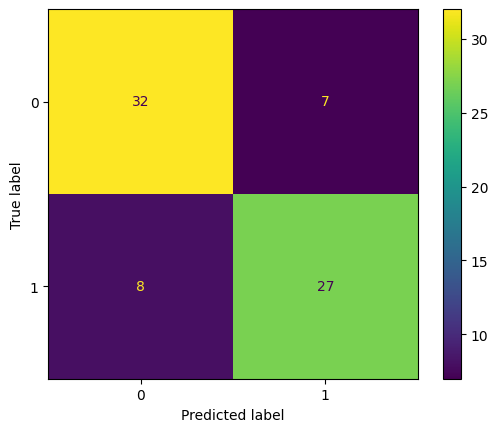

In [55]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

# Catboost

In [13]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

X = data.drop(['HeartDisease'],axis=1)
y = data["HeartDisease"]

#Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation and calculate metrics for each fold
fold = 1
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the CatBoostClassifier
    catboost_model = CatBoostClassifier(iterations=832, 
    learning_rate=0.01, 
    depth=3,
    verbose=0)

    catboost_model.fit(X_train, y_train)
    y_pred = catboost_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print metrics for each fold
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    fold += 1

# Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")

Fold 1 - Accuracy: 0.8533333333333334, Precision: 0.8571428571428571, Recall: 0.8333333333333334, F1-Score: 0.8450704225352113
Fold 2 - Accuracy: 0.92, Precision: 0.9411764705882353, Recall: 0.8888888888888888, F1-Score: 0.9142857142857143
Fold 3 - Accuracy: 0.8666666666666667, Precision: 0.8095238095238095, Recall: 0.9444444444444444, F1-Score: 0.8717948717948718
Fold 4 - Accuracy: 0.9066666666666666, Precision: 0.8918918918918919, Recall: 0.9166666666666666, F1-Score: 0.9041095890410958
Fold 5 - Accuracy: 0.8266666666666667, Precision: 0.8285714285714286, Recall: 0.8055555555555556, F1-Score: 0.8169014084507044
Fold 6 - Accuracy: 0.92, Precision: 0.8947368421052632, Recall: 0.9444444444444444, F1-Score: 0.918918918918919
Fold 7 - Accuracy: 0.8783783783783784, Precision: 0.8421052631578947, Recall: 0.9142857142857143, F1-Score: 0.8767123287671234
Fold 8 - Accuracy: 0.8513513513513513, Precision: 0.8529411764705882, Recall: 0.8285714285714286, F1-Score: 0.8405797101449276
Fold 9 - Accu

In [19]:
Mean Accuracy: 0.8739279279279278
Mean Precision: 0.8546642711028195
Mean Recall: 0.8904761904761905
Mean F1-Score: 0.8707766246712133
        # Initialize the CatBoostClassifier
    catboost_model = CatBoostClassifier(iterations=832, 
    learning_rate=0.01, 
    depth=3,
    verbose=0)

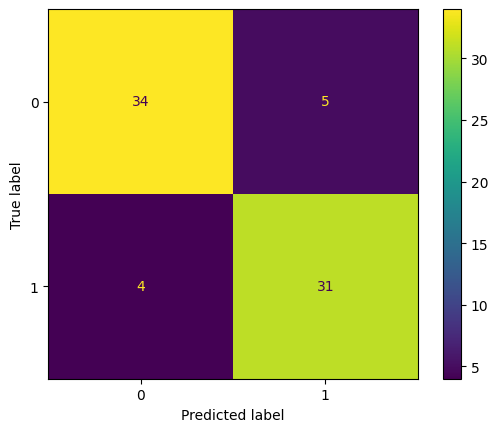

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

using optuna optimization [https://www.kaggle.com/code/kaanboke/beginner-friendly-catboost-with-optuna](http://)

In [9]:
import optuna
from tqdm import tqdm
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['HeartDisease'], axis=1)
y = data["HeartDisease"]

# Define the objective function
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'iterations': trial.suggest_int('iterations', 50, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 3, 10)
    }

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Run optimization with tqdm progress bar for each trial
    with tqdm(total=5, desc='Trial') as pbar:
        for train_index, test_index in cv.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Initialize the CatBoostClassifier with trial parameters
            catboost_model = CatBoostClassifier(**params, verbose=0)

            catboost_model.fit(X_train, y_train)
            y_pred = catboost_model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

            pbar.update()

    # Calculate the mean of each metric
    mean_accuracy = sum(accuracies) / len(accuracies)

    # Return the negative of accuracy since Optuna aims to minimize the objective function
    return -mean_accuracy

# Run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best parameters and best score
best_params = study.best_params
best_score = -study.best_value

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

[I 2024-04-29 15:41:34,281] A new study created in memory with name: no-name-e2b0e806-6761-4a3e-a872-3313e5f489ed
Trial: 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]
[I 2024-04-29 15:41:36,826] Trial 0 finished with value: -0.8699597315436242 and parameters: {'iterations': 517, 'learning_rate': 0.005624702210514972, 'depth': 3}. Best is trial 0 with value: -0.8699597315436242.
Trial: 100%|██████████| 5/5 [00:53<00:00, 10.72s/it]
[I 2024-04-29 15:42:30,443] Trial 1 finished with value: -0.871284116331096 and parameters: {'iterations': 1833, 'learning_rate': 0.002951057220336337, 'depth': 10}. Best is trial 1 with value: -0.871284116331096.
Trial: 100%|██████████| 5/5 [00:11<00:00,  2.40s/it]
[I 2024-04-29 15:42:42,429] Trial 2 finished with value: -0.8739776286353468 and parameters: {'iterations': 1583, 'learning_rate': 0.005620681301345628, 'depth': 6}. Best is trial 2 with value: -0.8739776286353468.
Trial: 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]
[I 2024-04-29 15:42:43,777] Tri

Best Parameters: {'iterations': 1876, 'learning_rate': 0.003194599654165372, 'depth': 8}
Best Score: 0.8753199105145415
